In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/train.csv")
#df.head()

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.isna().sum()[df.isna().sum() != 0] / df.shape[0] *100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Columns with more than 80% missing values in a dataset of 1400 values most likely do not contain enough information to have significant influence into the learning process and can be dropped.


In [ ]:
df.isna().sum()[df.isna().sum() >= df.shape[0]*0.2].index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
df_dropped_na = df.copy()
df_dropped_na.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df_dropped_na.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

GarageFinish


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


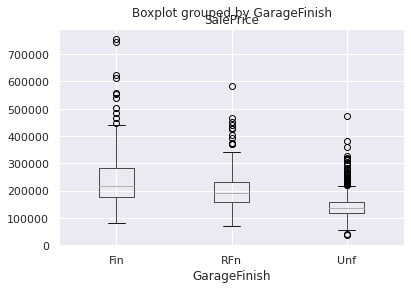

In [ ]:
#col = df_dropped_na.columns[1]
col = "GarageFinish"
#pd.set_option("display.max_rows",20)
print(col)

#df_dropped_na.groupby(col)["SalePrice"].describe().reset_index()#.sort_values("mean", ascending=False)
#plt.scatter(df_dropped_na[col],df_dropped_na.SalePrice)
#sns.lmplot(x=col,y='SalePrice',data=df_dropped_na,fit_reg=True)
df_dropped_na.boxplot(column=["SalePrice"], by=col)
#df_dropped_na[col].value_counts()

In [ ]:
#@title Results for exploration of columns

"""
Bold == might be influential

- MSSubClass -> many non-linear values
- **MSZoning** -> seemingly good correlation BUT few examples for most categories
- LotFrontage -> seems very inconsistent
- LotArea -> almost no influence
- Street -> to little examples of non-Pave
- **LotShape** -> to little examples for IR2, IR3 and almost no difference across the descriptive statistics, apart from IR having slightly higher values
- **LandContour** -> scatterplot reveals non-lvl areas are generally less valuable
- Utilities -> only one value is not "AllPub" so it's worthless for the algorithm
- LotConfig -> seems to have little influence
- LandSlope -> insignificant differences in describe
- Neighborhood -> boxplot: large difference inbetween different values, may need OHE
- Condition1 -> boxplot reveal very similar mean and overall few meaning
- Condition2 -> value_counts() = almost only normal
- BldgType -> few values, overall very similar
- **HouseStyle** -> 1Story and 2Story are quite different, few other values, might be sorted into the two
###- OverallQual -> boxplot and description show strong relation to the saleprice
- OverallCond -> seemingly no significant correlation
- YearBuilt -> slight influence
- YearRemodAdd -> no variation
- RoofStyle -> 2 options with sufficient entries, but only slight difference
- RoofMatl -> not enough values
- Exterior1st -> Value for CemntBD and VinylSd seem slightly higher but overall insignificant
  - df_ext = df_dropped_na[df_dropped_na.Exterior1st.isin(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd','BrkFace'])]
  - df_ext.boxplot(["SalePrice"], by=col)
  - plt.scatter(df_ext[col], df_ext.SalePrice)
- Exterior2nd -> mostly the same to Exterior1st
- **MasVnrType** -> some are slightly more valuable
- MasVnrArea -> scatterplot: large spread without linearity
- ExterQual
- ExterCond
- **Foundation** -> PConc seems slightly better than rest
- **BsmtQual** -> add FA to TA
- BsmtCond
- BsmtExposure
- **BsmtFinType1**
- BsmtFinSF1
- BsmtFinType2
- BsmtFinSF2
- **BsmtUnfSF**
- **TotalBsmtSF** -> strongest linear relation of all Bsmt
- Heating
###- HeatingQC
###- CentralAir
###- Electrical -> SBrkr good, rest bad
###- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
###- GrLivArea
- **BsmtFullBath** -> "0" or "1+" is enough
- BsmtHalfBath
###- FullBath -> linear, except for 0
- HalfBath
- BedroomAbvGr -> slight linear, except for 0
- KitchenAbvGr
- **KitchenQual**
###- TotRmsAbvGrd - except 12
- Functional
- **Fireplaces**
###- GarageType - imputing 2 categories
- **GarageYrBlt**
###- GarageFinish
###- GarageCars - linear except 4
###- GarageArea
- GarageQual
- GarageCond
- PavedDrive
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SaleType
- **SaleCondition** - slight influence of certain categories
"""

In [ ]:
df_features_na = df_dropped_na.copy()
df_features_na.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [ ]:
df_features_na = df_features_na[["OverallQual","HeatingQC","CentralAir","Electrical","1stFlrSF","GrLivArea",
                                 "FullBath","TotRmsAbvGrd","GarageType","GarageFinish","GarageCars","GarageArea", "SalePrice"]]

In [ ]:
df_features_na.isnull().sum()[df_features_na.isnull().sum()!=0]

Series([], dtype: int64)

Drop the one example with missing Electrical info.
Missing values in GarageType and GarageFinish refer to houses which seem to have no Garage (space for 0 cars)

In [ ]:
df_features_na[df_features_na.GarageType.isnull() & df_features_na.GarageCars!=0].shape

(0, 13)

In [ ]:
df_features_na.dropna(0, subset=["Electrical"], inplace=True)

In [ ]:
df_features_na.isnull().sum()

OverallQual     0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageType      0
GarageFinish    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [ ]:
df_features_na["GarageType"] = df_features_na.GarageType.fillna("None")
df_features_na["GarageFinish"] = df_features_na.GarageFinish.fillna("Unf")

In [ ]:
df_features_na.isnull().sum()

OverallQual     0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageType      0
GarageFinish    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

Data is now cleaned and features are selected.
Next up is preprocessing the data with encoding and standardizing
Garage-Type: One-Hot-Encoding

Standardizing: 1stFlrSF, GrLiveArea, FullBath, ToRmsAbvGrd, GarageArea


In [ ]:
df_features = df_features_na.copy()

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OverallQual   1459 non-null   int64 
 1   HeatingQC     1459 non-null   object
 2   CentralAir    1459 non-null   object
 3   Electrical    1459 non-null   object
 4   1stFlrSF      1459 non-null   int64 
 5   GrLivArea     1459 non-null   int64 
 6   FullBath      1459 non-null   int64 
 7   TotRmsAbvGrd  1459 non-null   int64 
 8   GarageType    1459 non-null   object
 9   GarageFinish  1459 non-null   object
 10  GarageCars    1459 non-null   int64 
 11  GarageArea    1459 non-null   int64 
 12  SalePrice     1459 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 159.6+ KB


In [ ]:
df_features.HeatingQC.value_counts()

Ex    741
TA    428
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [ ]:
"""
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor
"""

qualMap = {
    "Ex": 4,
    "Gd": 3,
    "TA": 2,
    "Fa": 1,
    "Po": 0
}

In [ ]:
df_features["HeatingQC"] = df_features["HeatingQC"].map(qualMap).astype(np.int8)

In [ ]:
df_features.CentralAir.value_counts()

Y    1364
N      95
Name: CentralAir, dtype: int64

In [ ]:
df_features["CentralAir"] = df_features.CentralAir.map({"Y":True, "N":False}).astype(np.bool)

In [ ]:
df_features.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
# Note that on only matters if it is SBrkr
df_features["Electrical"] = df_features.Electrical.apply(lambda x: x == "SBrkr").astype(np.bool)

In [ ]:
df_features.Electrical.value_counts()

True     1334
False     125
Name: Electrical, dtype: int64

In [ ]:
df_features.GarageType.value_counts()
# do one-hot-encoding

Attchd     870
Detchd     387
BuiltIn     87
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
df_features.GarageFinish.value_counts()

Unf    686
RFn    422
Fin    351
Name: GarageFinish, dtype: int64

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1459 non-null   int64
 1   HeatingQC     1459 non-null   int8 
 2   CentralAir    1459 non-null   bool 
 3   Electrical    1459 non-null   bool 
 4   1stFlrSF      1459 non-null   int64
 5   GrLivArea     1459 non-null   int64
 6   FullBath      1459 non-null   int64
 7   TotRmsAbvGrd  1459 non-null   int64
 8   GarageFinish  1459 non-null   int64
 9   GarageCars    1459 non-null   int64
 10  GarageArea    1459 non-null   int64
 11  SalePrice     1459 non-null   int64
 12  2Types        1459 non-null   uint8
 13  Attchd        1459 non-null   uint8
 14  Basment       1459 non-null   uint8
 15  BuiltIn       1459 non-null   uint8
 16  CarPort       1459 non-null   uint8
 17  Detchd        1459 non-null   uint8
 18  None          1459 non-null   uint8
dtypes: bool(2), int64(9), int8(

In [ ]:
features = ['OverallQual', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea', '2Types', 'Attchd', 'Basment', 'BuiltIn',
       'CarPort', 'Detchd', 'None', 'SalePrice']
df_features = df_features[['OverallQual', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea', '2Types', 'Attchd', 'Basment', 'BuiltIn',
       'CarPort', 'Detchd', 'None', 'SalePrice']]

In [ ]:
df_features["GarageFinish"] = df_features.GarageFinish.map({"Unf":0, "RFn": 1, "Fin":2})

In [ ]:
df_features = df_features.join(pd.get_dummies(df_features.GarageType))

In [ ]:
df_features.drop("GarageType", inplace=True, axis=1)

In [ ]:
#df_features = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/df_preprocessed.csv", index_col=0)

In [ ]:
df_features.head()

,OverallQual,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,None,SalePrice
0,7,4,True,True,856,1710,2,8,1,2,548,0,1,0,0,0,0,0,208500
1,6,4,True,True,1262,1262,2,6,1,2,460,0,1,0,0,0,0,0,181500
2,7,4,True,True,920,1786,2,6,1,2,608,0,1,0,0,0,0,0,223500
3,7,3,True,True,961,1717,1,7,0,3,642,0,0,0,0,0,1,0,140000
4,8,4,True,True,1145,2198,2,9,1,3,836,0,1,0,0,0,0,0,250000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler(copy=False)

In [ ]:
df_features[['OverallQual', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea']] = scaler.fit_transform(df_features[['OverallQual', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea']])

In [ ]:
df_features.head()

,OverallQual,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,None,SalePrice
0,0.650852,0.890777,True,True,-0.794191,0.370055,0.790180,0.912128,0.283050,0.311842,0.350660,0,1,0,0,0,0,0,208500
1,-0.072372,0.890777,True,True,0.256426,-0.482514,0.790180,-0.318380,0.283050,0.311842,-0.060947,0,1,0,0,0,0,0,181500
2,0.650852,0.890777,True,True,-0.628576,0.514687,0.790180,-0.318380,0.283050,0.311842,0.631301,0,1,0,0,0,0,0,223500
3,0.650852,-0.151439,True,True,-0.522480,0.383376,-1.025367,0.296874,-0.949696,1.650010,0.790331,0,0,0,0,0,1,0,140000
4,1.374077,0.890777,True,True,-0.046338,1.298746,0.790180,1.527382,0.283050,1.650010,1.697737,0,1,0,0,0,0,0,250000


In [ ]:
df_features.to_csv("df_preprocessed.csv")

In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

#sc = pickle.load(open('scaler.pkl','rb'))

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle/House Prices/data/test.csv")

(1459, 80)

In [ ]:
features = ['OverallQual', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars',
       'GarageArea']#, '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None']
df_test[features].isna().sum()[df_test.isna().sum()>0]

GarageFinish    78
GarageCars       1
GarageArea       1
dtype: int64

In [ ]:
df_test[features][df_test.GarageArea.isna()]

,OverallQual,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea
1116,5,Ex,Y,SBrkr,942,1828,2,6,NaN,NaN,NaN


In [ ]:
df_test.GarageFinish.value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [ ]:
df_test[features][df_test.GarageFinish.isna() & df_test.GarageCars != 0]["GarageFinish"] = "Fin"

In [ ]:
df_test["GarageFinish"].fillna("Unf", inplace=True)
df_test[["GarageCars", "GarageArea"]] = df_test[["GarageCars", "GarageArea"]].fillna(0)

In [ ]:
df_test[features].isna().sum()[df_test.isna().sum()>0]

Series([], dtype: int64)

In [ ]:
df_test[features].to_csv("df_test_cleaned.csv")